In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Chargement des données
train_housing = pd.read_csv("./ynov-data/train_housing.csv")
train_titanic = pd.read_csv("./ynov-data/train_titanic.csv")


In [43]:
# Fonction pour afficher les informations de base d'un DataFrame
def explorer_dataset(df, nom):
    print(f"\n=== Exploration du dataset {nom} ===")
    print("\nAperçu des premières lignes:")
    print(df.head())
    print("\nInformations sur les colonnes:")
    print(df.info())
    print("\nStatistiques descriptives:")
    print(df.describe())
    print("\nValeurs manquantes par colonne:")
    print(df.isnull().sum())

In [44]:
# Explorer les datasets Housing
explorer_dataset(train_housing, "Train Housing")



=== Exploration du dataset Train Housing ===

Aperçu des premières lignes:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1627.0           280.0   
4    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       565.0       259.0         3.8462            342200.0        NEAR BAY   
4       413.0       193.0         4.0368            269700.0        NEAR 

In [45]:
# Explorer les datasets Titanic
explorer_dataset(train_titanic, "Train Titanic")



=== Exploration du dataset Train Titanic ===

Aperçu des premières lignes:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1

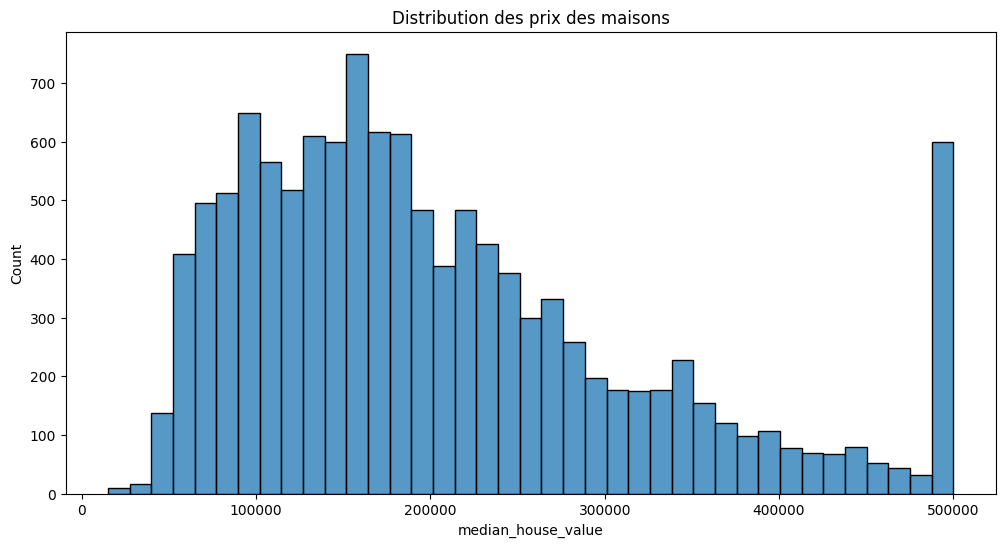

In [46]:
# Visualisations pour Housing
plt.figure(figsize=(12, 6))
sns.histplot(data=train_housing, x='median_house_value')
plt.title('Distribution des prix des maisons')
plt.show()

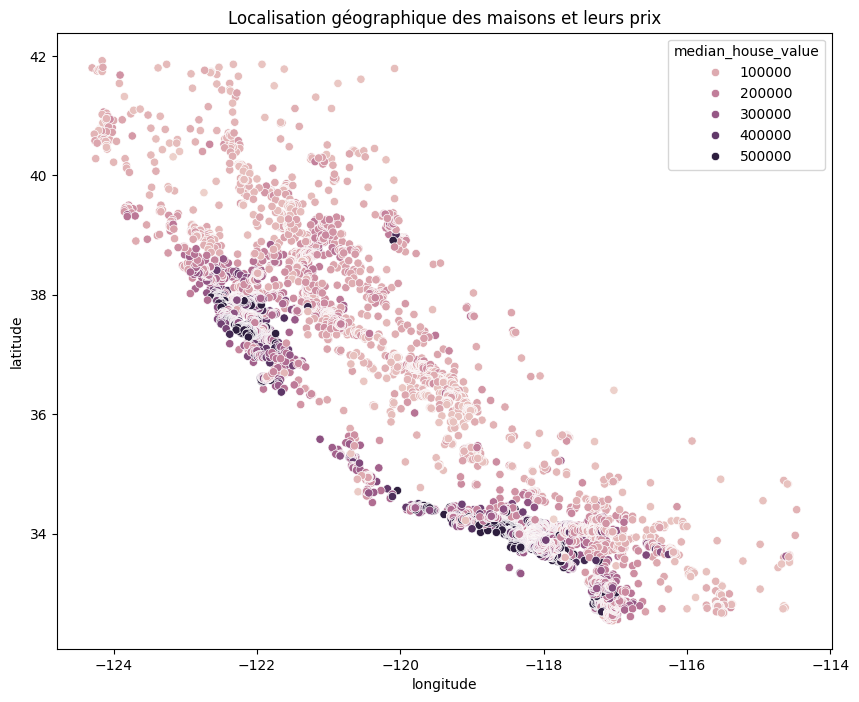

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_housing, x='longitude', y='latitude', hue='median_house_value')
plt.title('Localisation géographique des maisons et leurs prix')
plt.show()

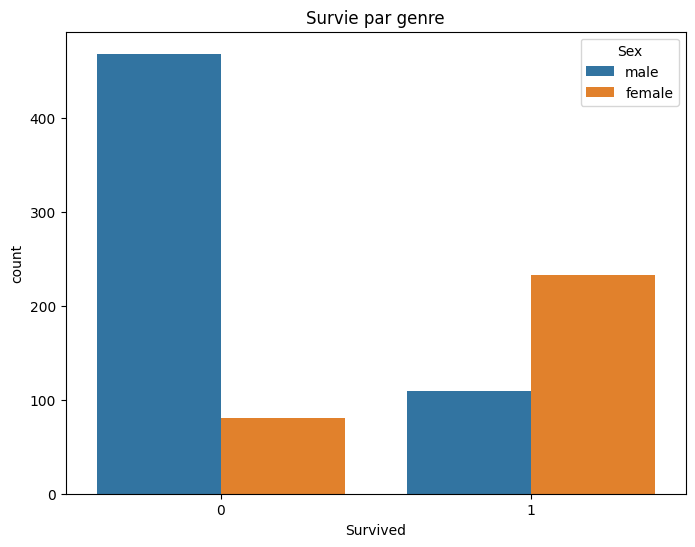

In [48]:
# Visualisations pour Titanic
plt.figure(figsize=(8, 6))
sns.countplot(data=train_titanic, x='Survived', hue='Sex')
plt.title('Survie par genre')
plt.show()

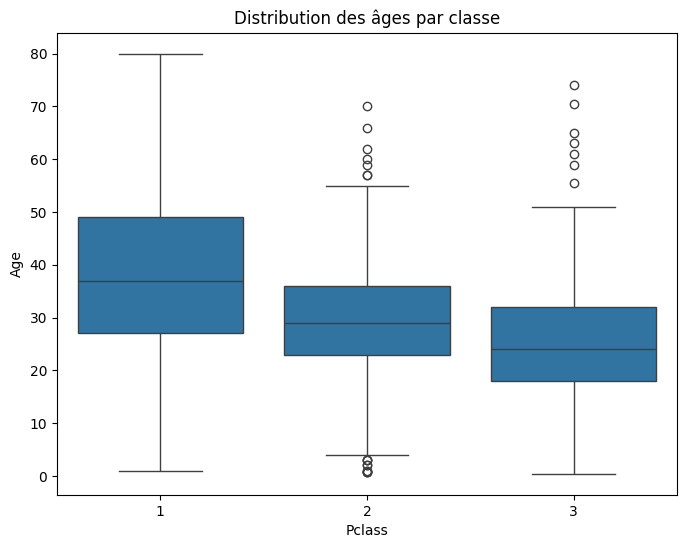

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_titanic, x='Pclass', y='Age')
plt.title('Distribution des âges par classe')
plt.show()


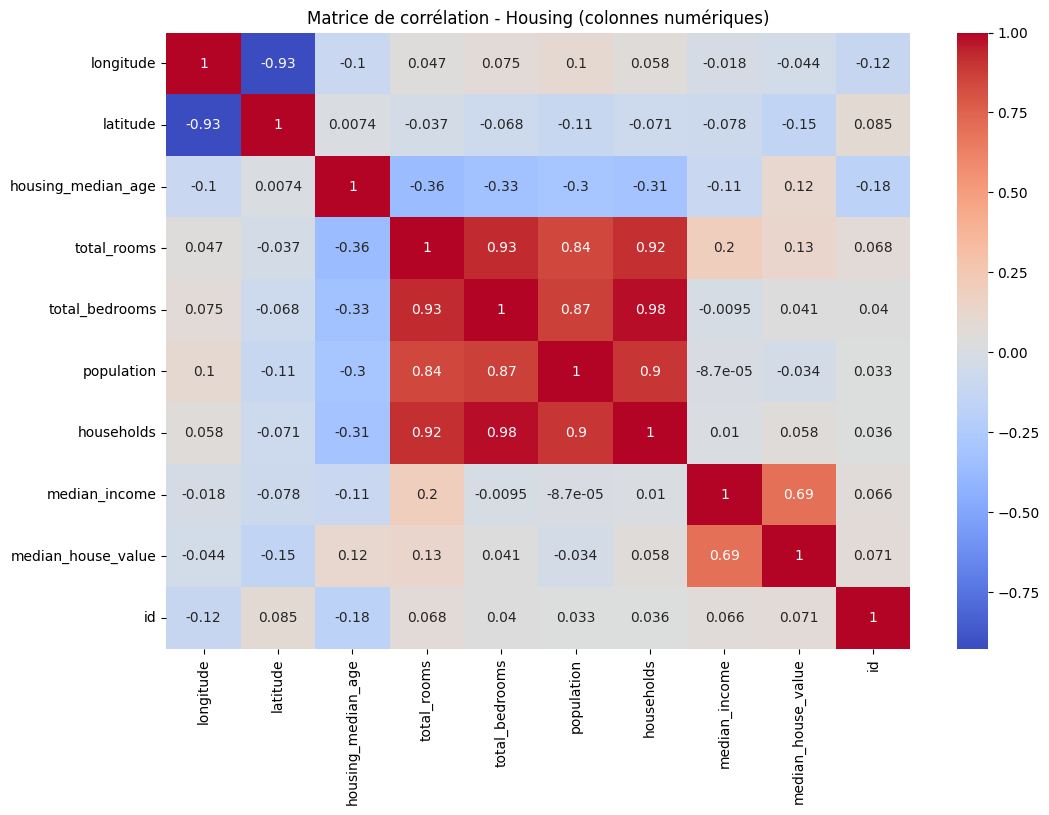

In [50]:
# Corrélations pour Housing - version corrigée
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = train_housing.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(train_housing[colonnes_numeriques].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation - Housing (colonnes numériques)')
plt.show()

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger le fichier CSV
data = pd.read_csv('./ynov-data/train_housing.csv')

# Diviser les données en ensembles d'entraînement et de validation
train_data, valid_data = train_test_split(data, test_size=0.2, random_state=42)

# Enregistrer les fichiers résultants
train_data.to_csv('./ynov-data/train_housing_train.csv', index=False)
valid_data.to_csv('./ynov-data/train_housing_valid.csv', index=False)

In [59]:

def calculer_mediane_prix():
    # Charger les données d'entraînement
    train_data = pd.read_csv('./ynov-data/train_housing_train.csv')
    
    # Calculer la médiane de median_house_value
    mediane = train_data['median_house_value'].median()
    
    print(f"La médiane des prix des maisons est : {mediane:,.2f}")
    
    return mediane


valid_data['prediction'] = calculer_mediane_prix()  # Ajout de la colonne prediction
valid_data.to_csv('./ynov-data/train_housing_valid.csv', index=False)  # Enregistrer le fichier avec la nouvelle colonne


La médiane des prix des maisons est : 179,000.00
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1935    -120.64     40.41                50.0       1741.0           424.0   
6494    -117.92     33.85                44.0       1231.0           258.0   
1720    -119.08     35.34                18.0       4070.0           512.0   
9120    -122.41     37.80                52.0       3697.0           837.0   
360     -122.16     37.70                36.0       1097.0           208.0   

      population  households  median_income  median_house_value  \
1935       987.0       383.0         1.5066             59300.0   
6494       682.0       244.0         3.2344            170100.0   
1720      1580.0       540.0        10.5941            245800.0   
9120      1446.0       711.0         5.8660            500001.0   
360        568.0       225.0         2.9917            194600.0   

     ocean_proximity     id  prediction  
1935          INLAND   3359    179000

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculer_mae_rmse():
    # Charger les données de validation
    valid_data = pd.read_csv('./ynov-data/train_housing_valid.csv')
    
    # Calculer MAE
    mae = mean_absolute_error(valid_data['median_house_value'], valid_data['prediction'])
    rmse = np.sqrt(mean_squared_error(valid_data['median_house_value'], valid_data['prediction']))  # Suppression de RMSE
    
    print(f"Erreur Absolue Moyenne (MAE) : {mae:,.2f}")
    print(f"Racine de l'Erreur Quadratique Moyenne (RMSE) : {rmse:,.2f}")  # Suppression de l'affichage de RMSE

calculer_mae_rmse()  

Erreur Absolue Moyenne (MAE) : 89,207.51
Racine de l'Erreur Quadratique Moyenne (RMSE) : 120,864.41


In [64]:
def creer_fichier_submission():
    # Charger les bibliothèques nécessaires
    import pandas as pd

    # Charger les données de test
    test_data = pd.read_csv('./ynov-data/test_housing.csv')

    # Calculer la médiane de 'median_house_value' à partir des données d'entraînement
    train_data = pd.read_csv('./ynov-data/train_housing_train.csv')
    mediane = train_data['median_house_value'].median()

    # Créer un DataFrame pour le fichier de soumission
    submission = pd.DataFrame({
        'id': test_data['id'],
        'median_house_value': mediane
    })

    # Enregistrer le fichier de soumission
    submission.to_csv('./ynov-data/submit.csv', index=False)

# Appeler la fonction pour créer le fichier de soumission
creer_fichier_submission()